In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics

E:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [10]:
#加载数字图片数据
digits=datasets.load_digits()
# digits
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
#获取样本数量，并将图片数据格式化
#（所有图片大小，像素点都一致=》转换成的向量大小一致）
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))
data.shape


(1797, 64)

In [7]:
##模型构建
classifier=svm.SVC(gamma=0.001) #默认是rbf

#使用1/2的数据集进行模型训练
#提取一半数据训练，后一半数据测试
classifier.fit(data[:int(n_samples/2)],digits.target[:int(n_samples/2)])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
#测试集数据部分实际值和预测值获取
#后一半数据作为测试集
expected=digits.target[int(n_samples/2):]  #y_test
predicted=classifier.predict(data[int(n_sample/2):]) #y_predicted

#生成一个分类报告classification_report
print("分类器%s的分类效果'：\n%s\n"%(classifier,metrics.classification_report(expected,predicted)))
print("score_svm:\n%f"%classifier.score(data[int(n_samples/2):],digits.target[int(n_samples/2):]))


# expected[expected!=predicted].shape

分类器SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)的分类效果'：
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


score_

(28,)

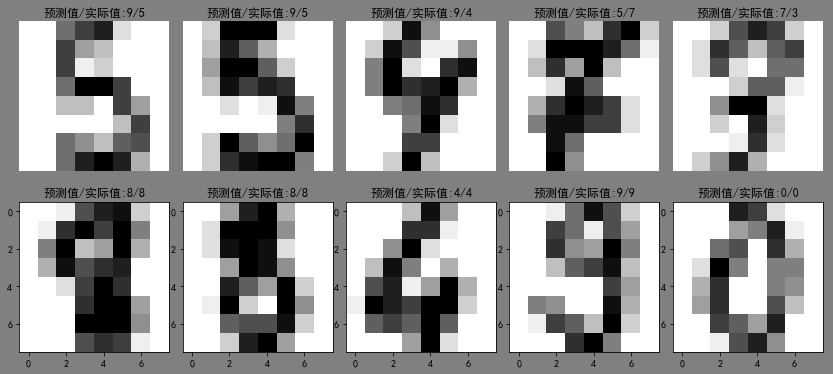

In [21]:
# 进行图片展示
plt.figure(facecolor='gray',figsize=(12,5))
#先画出5个预测失败的
#把预测错的值取出
images_and_predictions=list(zip(digits.images[int(n_samples/2):][expected!=predicted],expected[expected!=predicted],predicted[expected!=predicted]))
#通过enumerate，分别拿出前5个值
for index,(image,expection,prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest') #把cmap中的灰度值与image矩阵对应并填充
    plt.title(u'预测值/实际值:%i/%i' % (prediction, expection))

#再画5个预测成功的
images_and_predictions = list(zip(digits.images[int(n_samples / 2):][expected == predicted], expected[expected == predicted], predicted[expected == predicted]))
for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 6)
#     plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'预测值/实际值:%i/%i' % (prediction, expection))

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()    
